# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# set seaborn style to white
sns.set_style("darkgrid")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [3]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [4]:
apple = pd.read_csv(url)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [5]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [7]:
apple.set_index('Date', inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [8]:
if apple.index.is_unique:
    print('No duplicate dates in index')
else:
    print('There are duplicate dates.')

No duplicate dates in index


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [9]:
apple.sort_index(inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [10]:
# see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#indexing
# 'BM' is business month end
apple.asfreq('bm')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83


### Step 10.  What is the difference in days between the first day and the oldest

In [11]:
(apple.index[-1] - apple.index[0]).days

12261

### Step 11.  How many months in the data we have?

In [12]:
# since we already have the month end days from step 9, count them to get the total months of data
apple.asfreq('bm').index.nunique()

403

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

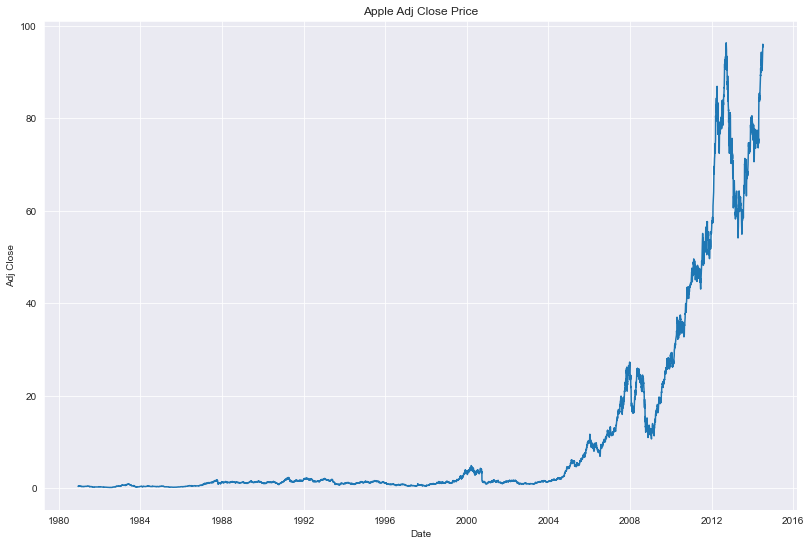

In [13]:
# set fig width x height in inches
fig = plt.figure(figsize =(13.5, 9)) 

sns.lineplot(x=apple.index, y='Adj Close', data=apple);

plt.title('Apple Adj Close Price')
plt.show()

### BONUS: Create your own question and answer it.